In [1]:
# κάνουμε εισαγωγή των απαραίτητων βιβλιοθηκών
import numpy as np
import pandas as pd

import sklearn

import seaborn as sns
from matplotlib import pyplot as plt #matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. More info here: https://matplotlib.org/3.5.0/tutorials/introductory/pyplot.html
plt.style.use('dark_background')

## Read Dataset 

In [2]:
data = pd.read_csv('housing.csv') # διαβάζουμε το dataset, το οποίο θα έχουμε κατεβάσει σε csv

In [3]:
print(data) # data contains the whole dataset

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

## Correlation/Covariance

In [4]:
data.corr() # https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


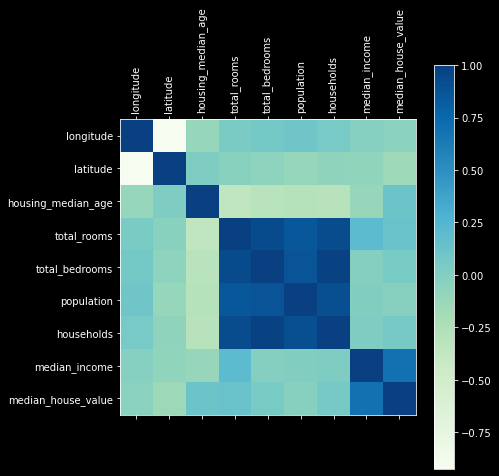

In [5]:
# figsize(width, hight) είναι το μέγεθος του γραφήματος
# το subplots(1,1) σημαίνει ότι στο γράφημά μου έχω μία γραμμή και μία στήλη (δες εδώ https://matplotlib.org/3.5.0/gallery/subplots_axes_and_figures/subplots_demo.html)
fig, ax = plt.subplots(1,1, figsize=(7,7)) 
sm = ax.matshow(data.corr(), cmap='GnBu') # το cmap είναι το χρώμα

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('corrmap.png', dpi=300)
plt.show()

In [6]:
data.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.876851e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-6.029962e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.700313e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.567306e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.191391e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.578295e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.180851e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.416878e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


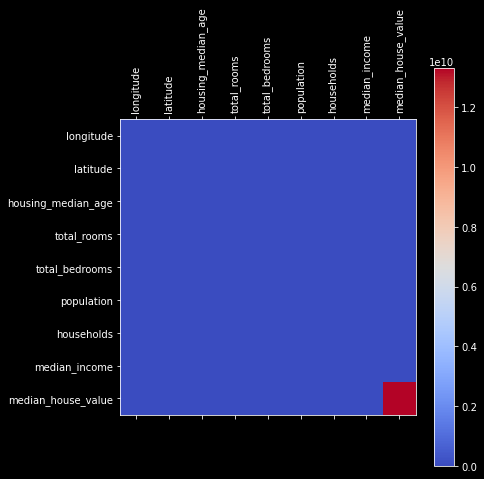

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(data.cov(), cmap='coolwarm')

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('covmap.png', dpi=300)
plt.show()

## Scatter Plot

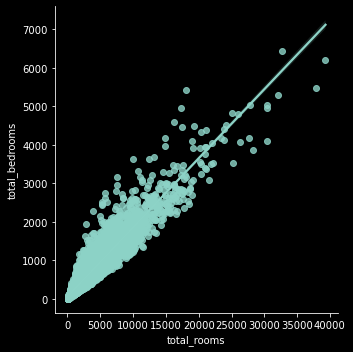

In [8]:
sns.lmplot(x="total_rooms", y="total_bedrooms", data=data, )

<AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>

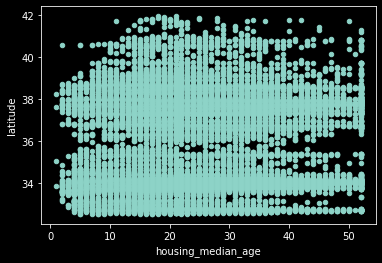

In [9]:
data.plot.scatter(x='housing_median_age', y='latitude')

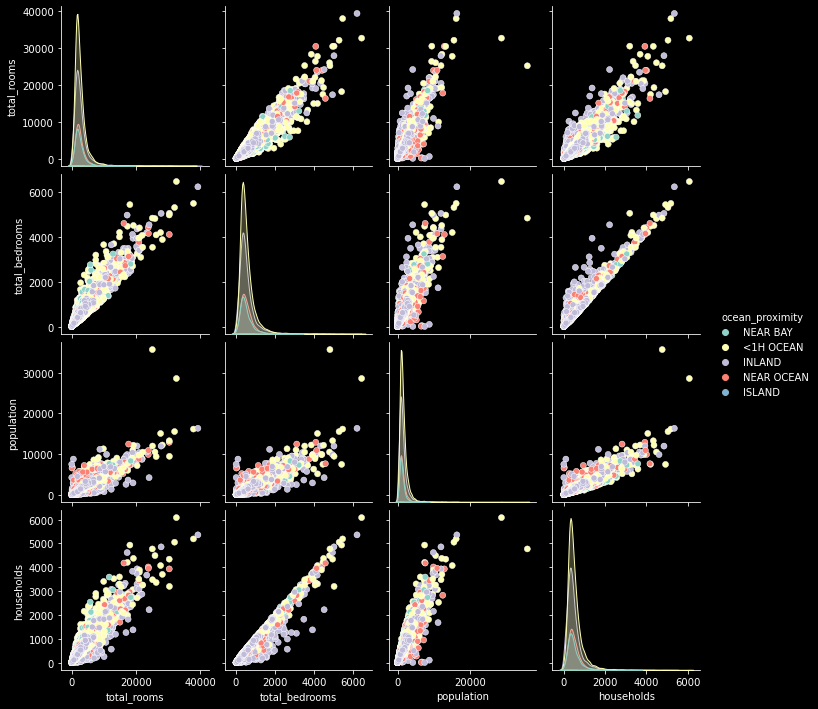

In [10]:
sns.pairplot(data=data[['total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']], hue="ocean_proximity")

## Boxplot

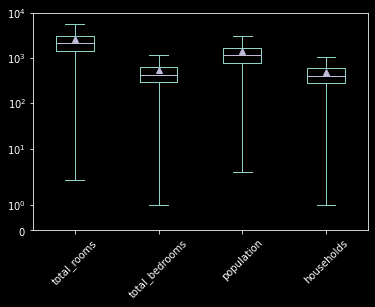

In [11]:
fig, ax = plt.subplots(1,1)

data[['total_rooms', 'total_bedrooms', 'population', 'households']].plot.box(ax=ax, rot=45, showmeans=True, showfliers=False)

ax.set_ylim(0, 10000)
ax.set_yscale('symlog')

## Data Preprocessing

In [12]:
# Missing Values per Column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
# value_counts(): Return a Series containing counts of unique values.
# loc(): selects specific row or column of the dataset
# εδώ επιλέγουμε από την στήλη "total_bedrooms" όσες γραμμές έχουν κενό, και μετά κάνουμε ένα group by με βάση τη στήλη "ocean_proximity"
data.loc[data.total_bedrooms.isna()].ocean_proximity.value_counts()

<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: ocean_proximity, dtype: int64

In [14]:
# παίρνω τον μέσο όρο μίας στήλης, η στήλη πρέπει να περιέχει αριθμητικά δεδομένα
data.total_bedrooms.mean()

537.8705525375618

In [15]:
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. ocean_proximity)
total_bedrooms_op = data.groupby('ocean_proximity').apply(lambda l: l.total_bedrooms.mean()).astype(int)
print(total_bedrooms_op)
data.loc[:, 'total_bedrooms_mean'] = data.groupby('ocean_proximity', group_keys=False).apply(lambda l: l.total_bedrooms.fillna(total_bedrooms_op[l.name]))

ocean_proximity
<1H OCEAN     546
INLAND        533
ISLAND        420
NEAR BAY      514
NEAR OCEAN    538
dtype: int32


In [16]:
# Fill NaN values  --  USE the MEDIAN per "class" (e.g. ocean_proximity)
total_bedrooms_op = data.groupby('ocean_proximity').apply(lambda l: l.total_bedrooms.median())
print(total_bedrooms_op)
data.loc[:, 'total_bedrooms_median'] = data.groupby('ocean_proximity', group_keys=False).apply(lambda l: l.total_bedrooms.fillna(total_bedrooms_op[l.name]))

ocean_proximity
<1H OCEAN     438.0
INLAND        423.0
ISLAND        512.0
NEAR BAY      423.0
NEAR OCEAN    464.0
dtype: float64


In [17]:
data.groupby(data['ocean_proximity']).groups

{'<1H OCEAN': [701, 830, 859, 860, 861, 862, 863, 870, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 910, 912, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 945, 946, 947, 948, 949, 950, 951, 952, 953, 955, 956, 958, 959, 960, 961, 962, 963, 964, 966, 971, 972, 978, 989, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, ...], 'INLAND': [954, 957, 965, 967, 968, 969, 970, 973, 974, 975, 976, 977, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 10

In [18]:
# AVERAGE / MEDIAN per 'ocean_proximity' can be deceiving, lets use the houses' price. BUT its a numeric feature --> DISCRETIZATION
data.loc[:, 'median_house_value_range'] = pd.cut(data.median_house_value, bins=15)
# data.median_house_value_range.value_counts(sort=False)

# Fill NaN values  --  USE the MEDIAN per "houses' price range"
total_bedrooms_op = data.groupby('median_house_value_range').apply(lambda l: l.total_bedrooms.median()).astype(int)
print(total_bedrooms_op)
data.loc[:, 'total_bedrooms_median_prange'] = data.groupby('median_house_value_range', group_keys=False).apply(lambda l: l.total_bedrooms.fillna(total_bedrooms_op[l.name]))

median_house_value_range
(14513.998, 47332.467]      324
(47332.467, 79665.933]      376
(79665.933, 111999.4]       406
(111999.4, 144332.867]      453
(144332.867, 176666.333]    430
(176666.333, 208999.8]      447
(208999.8, 241333.267]      463
(241333.267, 273666.733]    474
(273666.733, 306000.2]      478
(306000.2, 338333.667]      448
(338333.667, 370667.133]    449
(370667.133, 403000.6]      461
(403000.6, 435334.067]      472
(435334.067, 467667.533]    471
(467667.533, 500001.0]      407
dtype: int32


In [19]:
data.loc[data.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_mean,total_bedrooms_median,median_house_value_range,total_bedrooms_median_prange
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,514.0,423.0,"(144332.867, 176666.333]",430.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,514.0,423.0,"(79665.933, 111999.4]",406.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,514.0,423.0,"(144332.867, 176666.333]",430.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,514.0,423.0,"(241333.267, 273666.733]",474.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,514.0,423.0,"(176666.333, 208999.8]",447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,538.0,464.0,"(208999.8, 241333.267]",463.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,538.0,464.0,"(144332.867, 176666.333]",430.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,546.0,438.0,"(403000.6, 435334.067]",472.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,546.0,438.0,"(241333.267, 273666.733]",474.0


In [20]:
~data[target].isna()

NameError: name 'target' is not defined

In [ ]:
# ALTERNATIVE - Infer it using another correlated feature (e.g. households, total_rooms)
from sklearn.linear_model import LinearRegression

# input, target = 'households', 'total_bedrooms'
input, target = 'total_rooms', 'total_bedrooms'

lr = LinearRegression()

# Find samples with non-missing values
mask = ~data[target].isna()

# Train the model on known values
X = data.loc[mask, input].values.reshape(-1, 1)
y = data.loc[mask, target].values.reshape(-1, 1)
lr.fit(X,y)

# Fill in the Missing values
pred = lr.predict(data.loc[~mask, input].values.reshape(-1, 1)).astype(int)
data.loc[~mask, 'total_bedrooms_lr'] = pred

In [ ]:
data.loc[data.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_mean,median_house_value_range,total_bedrooms_median_prange,total_bedrooms_lr,total_bedrooms_median
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,514.0,"(144332.867, 176666.333]",430.0,290.0,423.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,514.0,"(79665.933, 111999.4]",406.0,242.0,423.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,514.0,"(144332.867, 176666.333]",430.0,989.0,423.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,514.0,"(241333.267, 273666.733]",474.0,224.0,423.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,514.0,"(176666.333, 208999.8]",447.0,198.0,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,538.0,"(208999.8, 241333.267]",463.0,714.0,464.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,538.0,"(144332.867, 176666.333]",430.0,494.0,464.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,546.0,"(403000.6, 435334.067]",472.0,829.0,438.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,546.0,"(241333.267, 273666.733]",474.0,1053.0,438.0


##### Dealing With Missing Values in Python – A Complete Guide, https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [ ]:
np.array([[1,2,3], [4,5,6]]).reshape((2, -1))

array([[1, 2, 3],
       [4, 5, 6]])

## Chi-Squared Test 
##### Source: https://towardsdatascience.com/statistics-in-python-using-chi-square-for-feature-selection-d44f467ca745

### You now define your null hypothesis and alternate hypothesis. As explained earlier, they are:
  * #### H₀ (Null Hypothesis) — that the 2 categorical variables to be compared are independent of each other.
  * #### H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other.

### And you draw your conclusions based on the following p-value conditions:
  * #### p < 0.05 — this means the two categorical variables are correlated.
  * #### p > 0.05 — this means the two categorical variables are not correlated.


In [ ]:
contigency_pct = pd.crosstab(data['ocean_proximity'], data['median_house_value_range'], normalize='index')
contigency_pct

median_house_value_range,"(14513.998, 47332.467]","(47332.467, 79665.933]","(79665.933, 111999.4]","(111999.4, 144332.867]","(144332.867, 176666.333]","(176666.333, 208999.8]","(208999.8, 241333.267]","(241333.267, 273666.733]","(273666.733, 306000.2]","(306000.2, 338333.667]","(338333.667, 370667.133]","(370667.133, 403000.6]","(403000.6, 435334.067]","(435334.067, 467667.533]","(467667.533, 500001.0]"
ocean_proximity,,,,,,,,,,,,,,,
<1H OCEAN,0.000766,0.005801,0.052539,0.088332,0.172614,0.155210,0.140324,0.096213,0.066769,0.048708,0.048052,0.024081,0.017623,0.014448,0.068520
INLAND,0.017097,0.245917,0.261029,0.205770,0.117845,0.052511,0.039078,0.018470,0.012822,0.008548,0.006259,0.004274,0.002442,0.002442,0.005495
ISLAND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000
NEAR BAY,0.001747,0.013100,0.083406,0.085153,0.118341,0.117467,0.100000,0.095633,0.058079,0.064629,0.064192,0.042795,0.029694,0.024454,0.101310
NEAR OCEAN,0.001505,0.026336,0.081640,0.118886,0.118134,0.089917,0.105342,0.098947,0.079007,0.051166,0.051919,0.035741,0.027088,0.019940,0.094432


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency_pct) 

# Output Results (p-value)
print(p)

1.0


### Data Smoothing / Removing Outliers

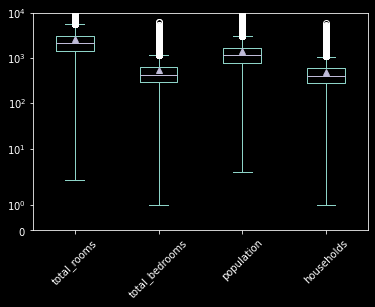

In [ ]:
fig, ax = plt.subplots(1,1)

data[['total_rooms', 'total_bedrooms', 'population', 'households']].plot.box(ax=ax, rot=45, showmeans=True)

ax.set_ylim(0, 10000)
ax.set_yscale('symlog')

### Outlier Detection (IQR Method - https://online.stat.psu.edu/stat200/lesson/3/3.2 - __IQR = Q75 - Q25__)
  * #### x > Q75 + 1.5 * IQR  
  * #### x < Q25 - 1.5 * IQR

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_mean,total_bedrooms_median_prange,total_bedrooms_lr,total_bedrooms_median
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,207.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,537.874806,536.876357,524.115942,536.852229
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,419.267716,419.393845,320.626126,419.390765
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,1.000000,92.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,297.000000,297.000000,299.000000,297.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,438.000000,435.000000,451.000000,435.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,643.250000,643.250000,686.000000,643.250000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,6445.000000,6445.000000,2165.000000,6445.000000


In [ ]:
feat = 'total_bedrooms'

q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

In [ ]:
~data.total_bedrooms.between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='neither')

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [ ]:
outliers = data.loc[~data.total_bedrooms.between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()
outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_mean,median_house_value_range,total_bedrooms_median_prange,total_bedrooms_lr,total_bedrooms_median,total_bedrooms_smooth
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY,2477.0,"(111999.4, 144332.867]",2477.0,NaN,2477.0,975
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY,1331.0,"(176666.333, 208999.8]",1331.0,NaN,1331.0,852
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY,1270.0,"(144332.867, 176666.333]",1270.0,NaN,1270.0,698
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY,1414.0,"(241333.267, 273666.733]",1414.0,NaN,1414.0,862
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY,1603.0,"(241333.267, 273666.733]",1603.0,NaN,1603.0,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND,1516.0,"(144332.867, 176666.333]",1516.0,NaN,1516.0,1530
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND,1820.0,"(176666.333, 208999.8]",1820.0,NaN,1820.0,1233
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,1857.0,"(208999.8, 241333.267]",1857.0,NaN,1857.0,1560
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,2640.0,"(111999.4, 144332.867]",2640.0,NaN,2640.0,2122


In [ ]:
# Smoothing ```total_bedrooms``` feature using Regression based on ```total_rooms```
from sklearn.linear_model import LinearRegression

normal = data.drop(outliers.index, axis=0).copy()
input, target = 'total_rooms', 'total_bedrooms'

lr = LinearRegression()

# Train the model on non-outlier values
X = normal.loc[:, input].values.reshape(-1, 1)
y = normal.loc[:, target].values.reshape(-1, 1)
lr.fit(X,y)

# Fill in the Missing values
pred = lr.predict(data.loc[:, input].values.reshape(-1, 1)).astype(int)
data.loc[:, f'{target}_smooth'] = pred

In [ ]:
data.loc[~data[f'{feat}_smooth'].between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_mean,median_house_value_range,total_bedrooms_median_prange,total_bedrooms_lr,total_bedrooms_median,total_bedrooms_smooth
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0,"(338333.667, 370667.133]",1106.0,NaN,1106.0,1273
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY,2048.0,"(370667.133, 403000.6]",2048.0,NaN,2048.0,2240
508,-122.30,37.84,14.0,7355.0,2408.0,3100.0,2051.0,4.0018,143800.0,NEAR BAY,2408.0,"(111999.4, 144332.867]",2408.0,NaN,2408.0,1316
568,-122.24,37.73,21.0,7031.0,1249.0,2930.0,1235.0,4.5213,228400.0,NEAR BAY,1249.0,"(208999.8, 241333.267]",1249.0,NaN,1249.0,1262
570,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110,350700.0,NEAR BAY,2885.0,"(338333.667, 370667.133]",2885.0,NaN,2885.0,3216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND,1820.0,"(176666.333, 208999.8]",1820.0,NaN,1820.0,1233
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,1857.0,"(208999.8, 241333.267]",1857.0,NaN,1857.0,1560
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,2640.0,"(111999.4, 144332.867]",2640.0,NaN,2640.0,2122
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND,1052.0,"(144332.867, 176666.333]",1052.0,NaN,1052.0,1224


In [ ]:
### ALTERNATIVE: Detect and Drop Outliers using Clustering (e.g. DBSCAN)

## Data Integration and Handling Redundancy

In [ ]:
data_smoothed = data[['total_bedrooms_smooth', 'total_bedrooms_mean', 'total_bedrooms_median', 'median_house_value_range', 'total_bedrooms_median_prange']]
data.drop(['total_bedrooms_smooth', 'total_bedrooms_mean', 'total_bedrooms_median', 'median_house_value_range', 'total_bedrooms_median_prange'], axis=1, inplace=True)
data_shard1, data_shard2, data_shard3 = data.loc[0: 7000], data.loc[5000: 15000], data.loc[14000:]

In [ ]:
data_wr = pd.concat((data_shard1, data_shard2, data_shard3))
data_wr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_lr
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,NaN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,NaN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,NaN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,NaN
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,NaN
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,NaN
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,NaN
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,NaN


In [ ]:
data_wr.duplicated().any()

True

In [ ]:
data_wr.loc[data_wr.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_lr
5000,-118.28,33.99,49.0,2174.0,481.0,1861.0,484.0,1.7159,95000.0,<1H OCEAN,NaN
5001,-118.28,33.99,46.0,1211.0,321.0,1153.0,282.0,1.7849,99300.0,<1H OCEAN,NaN
5002,-118.32,34.01,52.0,3104.0,645.0,1498.0,581.0,2.6667,128000.0,<1H OCEAN,NaN
5003,-118.32,34.02,50.0,1655.0,256.0,672.0,260.0,4.2554,194300.0,<1H OCEAN,NaN
5004,-118.32,34.02,48.0,1949.0,308.0,823.0,340.0,3.3906,189700.0,<1H OCEAN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14996,-117.04,32.73,25.0,1375.0,267.0,1032.0,278.0,3.5492,125400.0,NEAR OCEAN,NaN
14997,-117.05,32.72,35.0,3669.0,617.0,1694.0,585.0,3.9485,133900.0,NEAR OCEAN,NaN
14998,-117.05,32.73,27.0,3184.0,588.0,1763.0,571.0,3.5529,133900.0,NEAR OCEAN,NaN
14999,-117.03,32.74,35.0,1878.0,454.0,991.0,409.0,2.4345,129700.0,NEAR OCEAN,NaN


In [ ]:
data_wr.drop_duplicates(keep='first')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data_smoothed

,total_bedrooms_smooth,total_bedrooms_mean,total_bedrooms_median,median_house_value_range,total_bedrooms_median_prange
0,226,129.0,129.0,"(435334.067, 467667.533]",129.0
1,1273,1106.0,1106.0,"(338333.667, 370667.133]",1106.0
2,325,190.0,190.0,"(338333.667, 370667.133]",190.0
3,292,235.0,235.0,"(338333.667, 370667.133]",235.0
4,352,280.0,280.0,"(338333.667, 370667.133]",280.0
...,...,...,...,...,...
20635,358,374.0,374.0,"(47332.467, 79665.933]",374.0
20636,195,150.0,150.0,"(47332.467, 79665.933]",150.0
20637,457,485.0,485.0,"(79665.933, 111999.4]",485.0
20638,391,409.0,409.0,"(79665.933, 111999.4]",409.0


In [ ]:
data_wr.join(data_smoothed)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_smooth,total_bedrooms_mean,total_bedrooms_median,median_house_value_range,total_bedrooms_median_prange
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,226,129.0,129.0,"(435334.067, 467667.533]",129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1273,1106.0,1106.0,"(338333.667, 370667.133]",1106.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,325,190.0,190.0,"(338333.667, 370667.133]",190.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,292,235.0,235.0,"(338333.667, 370667.133]",235.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,352,280.0,280.0,"(338333.667, 370667.133]",280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,358,374.0,374.0,"(47332.467, 79665.933]",374.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,195,150.0,150.0,"(47332.467, 79665.933]",150.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,457,485.0,485.0,"(79665.933, 111999.4]",485.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,391,409.0,409.0,"(79665.933, 111999.4]",409.0


In [ ]:
pd.merge(data_wr, data_smoothed, left_index=True, right_index=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_smooth,total_bedrooms_mean,total_bedrooms_median,median_house_value_range,total_bedrooms_median_prange
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,226,129.0,129.0,"(435334.067, 467667.533]",129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1273,1106.0,1106.0,"(338333.667, 370667.133]",1106.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,325,190.0,190.0,"(338333.667, 370667.133]",190.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,292,235.0,235.0,"(338333.667, 370667.133]",235.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,352,280.0,280.0,"(338333.667, 370667.133]",280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,358,374.0,374.0,"(47332.467, 79665.933]",374.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,195,150.0,150.0,"(47332.467, 79665.933]",150.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,457,485.0,485.0,"(79665.933, 111999.4]",485.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,391,409.0,409.0,"(79665.933, 111999.4]",409.0
